In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

In [2]:
data = np.load('Data/species/species_train.npz')
train_locs = data['train_locs']  # 2D array, rows are number of datapoints and 
                                 # columns are "latitude" and "longitude"

kde = KernelDensity(bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree")
kde.fit(train_locs)

KernelDensity(algorithm='ball_tree', bandwidth=0.04, metric='haversine')

In [5]:
train_locs.shape

(272037, 2)

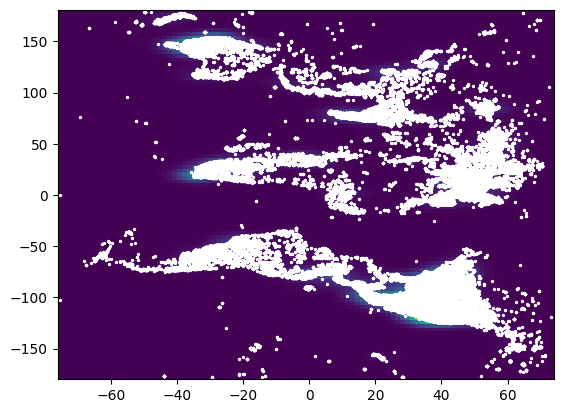

In [15]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

x = train_locs[:,0]
y = train_locs[:,1]

xx, yy, zz = kde2D(x, y, 4.0)

plt.pcolormesh(xx, yy, zz)
# Uncomment this line if you want to also plot with the data points
# plt.scatter(x, y, s=2, facecolor='white') 